In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import scipy.linalg as la
from scipy.constants import physical_constants

In [2]:
h_bar = physical_constants['Planck constant over 2 pi'][0]
h_bar_eV = physical_constants['Planck constant over 2 pi in eV s'][0]
m_el = physical_constants['electron mass'][0]
eV = physical_constants['electron volt'][0]

In [3]:
a = 1.0e-9
a_nm  = a*10**9
N = 100

t = (h_bar ** 2)/(2 * m_el * a * a)/eV
print(t)

0.03809981988649954


In [4]:
sys = kwant.Builder()
lat = kwant.lattice.chain(a_nm)

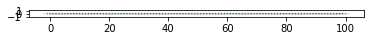

In [5]:
def onsite(site, xb1, xb2, Ub, Lb):
    (x,) = site.pos
    if (xb1 - Lb / 2) < x < (xb1 + Lb / 2) or (xb2 - Lb / 2) < x < (xb2 + Lb / 2):
        return 2 * t + Ub
    else:
        return 2 * t

for i in range(N):
    sys[lat(i)] = onsite

sys[lat.neighbors()] = -t

leadl = kwant.Builder(kwant.TranslationalSymmetry((-a_nm,)))
leadl[lat(0)] = 2 * t
leadl[lat.neighbors()] = -t

leadr = kwant.Builder(kwant.TranslationalSymmetry((a_nm,)))
leadr[lat(0)] = 2 * t
leadr[lat.neighbors()] = -t

sys.attach_lead(leadl)
sys.attach_lead(leadr)

kwant.plot(sys);

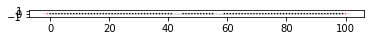

In [6]:
xb1, xb2 = 43, 57 
Lb = 4  
Ub = 0.5 * t  
sysf = sys.finalized()
kwant.plot(sysf, site_color = lambda site: sysf.hamiltonian(site, site, params = dict(xb1 = xb1, xb2 = xb2, Ub=Ub, Lb=Lb)), colorbar = False);

In [7]:
def calc_transmission(syst, ene, xb1, xb2, Ub, Lb):
    smatrix = kwant.smatrix(syst, ene, params=dict(xb1=xb1, xb2=xb2, Lb=Lb, Ub=Ub))
    return smatrix.transmission(1, 0)

In [8]:
Emin = 0.0001
Emax = 2 * Ub
NE = 600

Etab = np.linspace(Emin, Emax, NE)
Ttab = np.zeros(NE)

for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb)

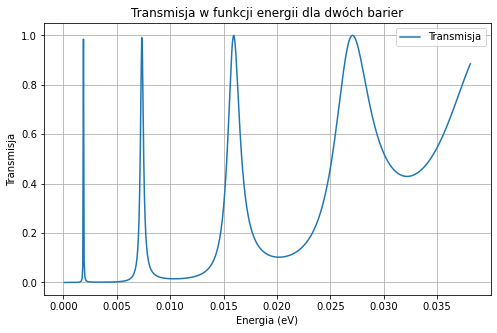

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(Etab, Ttab, label="Transmisja")
plt.xlabel("Energia (eV)")
plt.ylabel("Transmisja")
plt.title("Transmisja w funkcji energii dla dwóch barier")
plt.grid()
plt.legend()
plt.show()

In [10]:
from ipywidgets import interact

In [11]:
def plot_wf(i=0):
    ene = Emin + i*(Emax-Emin)/NE
    print("E = ", ene)
    wf = kwant.solvers.default.wave_function(sysf, ene, params = dict(xb1 = xb1, xb2 = xb2, Lb = Lb, Ub = Ub))
    plt.plot(np.abs(wf(0)[0])**2)
    plt.grid()

In [12]:
interact(plot_wf, i = (0, NE))

interactive(children=(IntSlider(value=0, description='i', max=600), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_wf(i=0)>

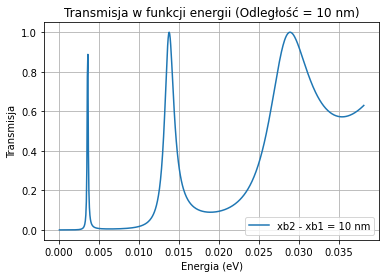

In [13]:
d = 10
xb2 = xb1 + d
for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb)

plt.plot(Etab, Ttab, label=f"xb2 - xb1 = {d} nm")
plt.xlabel("Energia (eV)")
plt.ylabel("Transmisja")
plt.title(f"Transmisja w funkcji energii (Odległość = {d} nm)")
plt.grid()
plt.legend()
plt.show()

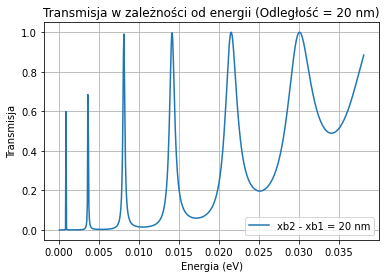

In [14]:
d = 20
xb2 = xb1 + d
for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb)

plt.plot(Etab, Ttab, label=f"xb2 - xb1 = {d} nm")
plt.xlabel("Energia (eV)")
plt.ylabel("Transmisja")
plt.title(f"Transmisja w zależności od energii (Odległość = {d} nm)")
plt.grid()
plt.legend()
plt.show()

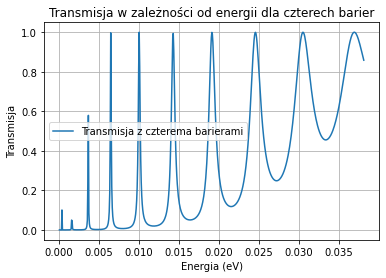

In [15]:
d = 30
xb2 = xb1 + d
for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb)

plt.plot(Etab, Ttab, label="Transmisja z czterema barierami")
plt.xlabel("Energia (eV)")
plt.ylabel("Transmisja")
plt.title("Transmisja w zależności od energii dla czterech barier")
plt.grid()
plt.legend()
plt.show()

In [58]:
def calc_transmission(syst, ene, xb1, xb2, Ub, Lb, xb3=None, xb4=None):
    params = dict(xb1=xb1, xb2=xb2, Ub=Ub, Lb=Lb)
    if xb3 is not None:
        params['xb3'] = xb3
    if xb4 is not None:
        params['xb4'] = xb4
    
    smatrix = kwant.smatrix(syst, ene, params=params)
    transmission = smatrix.transmission(1, 0)
    #print(f"Transmisja dla energii {ene:.3f} eV: {transmission}")
    return transmission

In [39]:
xb1 = 30
xb2 = 40
xb3 = 60
xb4 = 70
Lb = 4
Ub = 0.5 * t

In [40]:
def onsite(site, xb1, xb2, Ub, Lb, xb3, xb4):
    (x,) = site.pos
    if ((xb1 - Lb / 2) < x < (xb1 + Lb / 2) or
        (xb2 - Lb / 2) < x < (xb2 + Lb / 2) or
        (xb3 is not None and (xb3 - Lb / 2) < x < (xb3 + Lb / 2)) or
        (xb4 is not None and (xb4 - Lb / 2) < x < (xb4 + Lb / 2))):
        return 2 * t + Ub
    else:
        return 2 * t

sys = kwant.Builder()
for i in range(N):
    sys[lat(i)] = onsite
sys[lat.neighbors()] = -t
sys[lat.neighbors()] = -t

sys.attach_lead(leadl)
sys.attach_lead(leadr)
sysf = sys.finalized()

In [59]:
xb3, xb4 = 70, 85  
sysf = sys.finalized()
for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb, xb3=xb3, xb4=xb4)

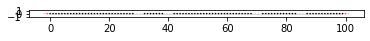

In [42]:
sysf = sys.finalized()
kwant.plot(
    sysf,
    site_color=lambda site: sysf.hamiltonian(
        site, site, params=dict(xb1=xb1, xb2=xb2, xb3=xb3, xb4=xb4, Ub=Ub, Lb=Lb)
    ),
    colorbar=False,
);

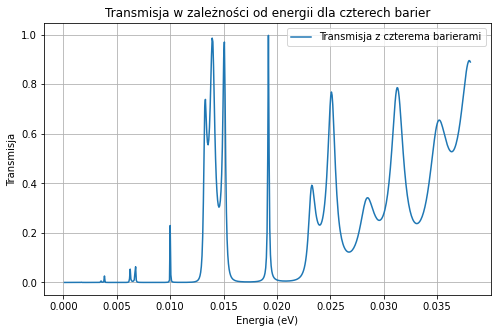

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(Etab, Ttab, label="Transmisja z czterema barierami")
plt.xlabel("Energia (eV)")
plt.ylabel("Transmisja")
plt.title("Transmisja w zależności od energii dla czterech barier")
plt.grid()
plt.legend()
plt.show()

In [44]:
def plot_wavefunction(sysf, energy, xb1, xb2, xb3, xb4, Ub, Lb):
    wf = kwant.solvers.default.wave_function(
        sysf, energy, params=dict(xb1=xb1, xb2=xb2, xb3=xb3, xb4=xb4, Ub=Ub, Lb=Lb)
    )
    psi = np.abs(wf(0)[0]) ** 2
    plt.plot(psi, label=f"Energia = {energy:.3f} eV")
    plt.xlabel("Indeks węzła")
    plt.ylabel("|Ψ|²")
    plt.title("Gęstość prawdopodobieństwa funkcji falowej")
    plt.grid()
    plt.legend()
    plt.show()

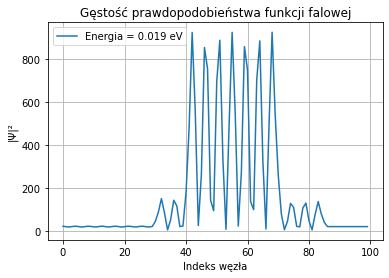

In [45]:
energy_resonance = Etab[np.argmax(Ttab)]
plot_wavefunction(sysf, energy_resonance, xb1, xb2, xb3, xb4, Ub, Lb)

In [46]:
from ipywidgets import interact

def plot_wf(i=0, xb1=43, xb2=57, xb3=70, xb4=85, Lb=4, Ub=0.5*t):
    ene = Emin + i * (Emax - Emin) / NE
    print(f"Energia = {ene:.4f} eV")
    
    wf = kwant.solvers.default.wave_function(
        sysf, ene,
        params=dict(xb1=xb1, xb2=xb2, xb3=xb3, xb4=xb4, Lb=Lb, Ub=Ub)
    )
    
    plt.figure(figsize=(8, 5))
    plt.plot(np.abs(wf(0)[0])**2, label=f"Energia = {ene:.4f} eV")
    plt.xlabel("Indeks węzła")
    plt.ylabel("Gęstość prawdopodobieństwa")
    plt.title("Gęstość funkcji falowej")
    plt.grid()
    plt.legend()
    plt.show()

In [47]:
interact(
    plot_wf, 
    i=(0, NE), 
    xb1=(40, 50, 1), 
    xb2=(55, 65, 1), 
    xb3=(70, 80, 1), 
    xb4=(80, 90, 1), 
    Lb=(1, 10, 1), 
    Ub=(0.1 * t, t, 0.1 * t)
)

interactive(children=(IntSlider(value=0, description='i', max=600), IntSlider(value=43, description='xb1', max…

<function __main__.plot_wf(i=0, xb1=43, xb2=57, xb3=70, xb4=85, Lb=4, Ub=0.01904990994324977)>

In [69]:
from scipy.signal import find_peaks
NE_high_res = 12000
Etab_high_res = np.linspace(Emin, Emax, NE_high_res)
Ttab_high_res = np.zeros(NE_high_res)

for i in range(NE):
    Ttab[i] = calc_transmission(sysf, Etab[i], xb1, xb2, Ub, Lb, xb3=xb3, xb4=xb4)
    
peaks, _ = find_peaks(Ttab, height=0.01)

if len(peaks) == 0:
    peaks, _ = find_peaks(Ttab, height=0.05)

resonant_energies = Etab_high_res[peaks]
print("Pierwsze trzy energie rezonansowe (eV):", resonant_energies[:3])

Pierwsze trzy energie rezonansowe (eV): [0.00028685 0.00040719 0.00043253]


U_b = 0.3
L_b = 5
d = xb2 - xb1  d = 10, 20, 30
E w 0 - 0.4 eV

Zwiększanie odległości między barierami

Piki rezonansowe przesuwają się w kierunku niższych energii, co oznacza, że układ może „wchwytywać” elektrony o mniejszych energiach. Dzieje się tak, ponieważ większe  d  zwiększa efektywną długość fali.
Liczba pików w badanym zakresie energii rośnie, ponieważ większa odległość  d  umożliwia więcej cykli interferencyjnych w przestrzeni między barierami.
    
Dodanie bariery 3 i 4

xb3 = 70  xb4 = 85
Odległość między barierami:  xb3 - xb2 = 20   xb4 - xb3 = 15 


Dodanie kolejnych barier wprowadza nowe warunki rezonansowe, co prowadzi do większej liczby pików transmisji.
Układ z trzema barierami:
Obserwujemy bardziej skomplikowany wzór transmisji. Pojawiają się nowe piki, odpowiadające stanom rezonansowym między dodatkowymi barierami.
Niektóre piki ulegają „rozszczepieniu”, co jest wynikiem dodatkowych interferencji fal elektronowych.
Układ z czterema barierami:
Struktura transmisji staje się jeszcze bardziej skomplikowana.
Obserwujemy zwiększoną liczbę wąskich pików, co oznacza, że układ lepiej selekcjonuje energie.

Porównanie dwóch, trzech i czterech barier


Dwie bariery:
Najprostszy układ, piki transmisji są szerokie i rzadziej rozmieszczone.
Trzy bariery:
Piki są bardziej liczne i węższe. Układ staje się bardziej selektywny energetycznie.
Cztery bariery:
Piki są jeszcze węższe i rozmieszczone w bardziej nieregularny sposób. Transmisja dla większości energii maleje, co wskazuje na wzrost odbicia.

Interpretacja:

Dodawanie barier zmienia charakter układu z prostego w bardziej skomplikowany układ. Układ staje się bardziej precyzyjnym filtrem kwantowym, przepuszczającym elektrony tylko o określonych energiach.
    
Wnioski

Rezonanse kwantowe w układzie potencjałów są silnie zależne od geometrii i odległości między barierami. Zmiana tych parametrów pozwala precyzyjnie kontrolować położenie pików rezonansowych.
Dodawanie kolejnych barier zwiększa liczbę możliwych stanów rezonansowych, ale  prowadzi do bardziej złożonego wzoru transmisji.